# Analysis of Yelp Business Intelligence Data
## Installation and Initial Setup
Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [1]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1605673365416_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d2/46/231de802ade4225b76b96cffe419cf3ce52bbe92e3b092cf12db7d11c207/kiwisolver-1.3.1-cp37-cp37m-manylinux1_x86_64.whl

  Usi

### Importing
Now, import the installed packages from the previous block below.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Loading Data
We are finally ready to load data. Using spark load the data from S3 into a dataframe object that we can manipulate further down in our analysis.

In [3]:
business = spark.read.json('s3://sta9760project02/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
review = spark.read.json('s3://sta9760project02/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Overview of Data
Display the number of rows and columns in our dataset.

In [5]:
print("Columns: "+str(len(business.columns))+" | Rows: "+str(business.count()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 14 | Rows: 209393

Display the DataFrame schema below.

In [6]:
business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* business_id
* name
* city
* state
* categories

In [7]:
business.select("business_id", "name", "city", "state","categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

## Analyzing Categories
Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as Active Life, for instance
* What are the top 20 most popular categories available?


In [8]:
from pyspark.sql.functions import explode, split
# create a new dataset with the categories split out
business_exploded = business.withColumn('category',explode(split('categories',",")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
# remove space
from pyspark.sql.functions import regexp_replace,col

def remove_space(col):
    return regexp_replace(col, "\\s+", "")

business_exploded = business_exploded.withColumn("category",remove_space(col("category")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Display the first 5 rows of your association table below.

In [10]:
business_exploded.select("business_id","category").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------------+
|         business_id|       category|
+--------------------+---------------+
|f9NumwFMBDn751xgF...|     ActiveLife|
|f9NumwFMBDn751xgF...|Gun/RifleRanges|
|f9NumwFMBDn751xgF...|      Guns&Ammo|
|f9NumwFMBDn751xgF...|       Shopping|
|Yzvjg0SayhoZgCljU...| Health&Medical|
+--------------------+---------------+
only showing top 5 rows

### Total Unique Categories
Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [11]:
business_exploded.select("category").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1336

### Top Categories By Business
Now let's find the top categories in this dataset by rolling up categories.

In [12]:
business_exploded.groupby("category").count().show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|      Dermatologists|  341|
|      Paddleboarding|   36|
|      LightingStores|   52|
|GeneratorInstalla...|   33|
|   FinancialAdvising|  387|
|             Embassy|   13|
|            Handyman|  682|
|             Tanning|  938|
|            SoulFood|  358|
|MusicalInstrument...|  219|
|PrivateInvestigation|   64|
|             Tempura|    1|
|  DigitizingServices|   10|
|          AutoRepair| 6657|
|         AerialTours|   28|
|             Falafel|  159|
|   NewMexicanCuisine|   83|
|        VinylRecords|  149|
|            Hotelbar|    2|
|   RetinaSpecialists|   25|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories
With this data available, let us now build a barchart of the top 20 categories.

In [13]:
barchart_df = business_exploded.groupby('category').count().orderBy('count',ascending=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
pdf = barchart_df.limit(20).toPandas().sort_values("count")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

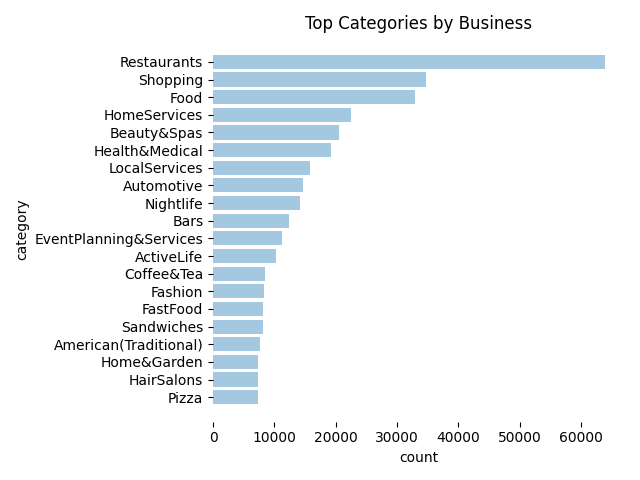

In [15]:
fig,ax=plt.subplots()
ax.barh(pdf["category"],pdf["count"],alpha=0.4)
ax.set_title("Top Categories by Business")
ax.set_xlabel("count")
ax.set_ylabel("category")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.tight_layout()
%matplot plt

## Do Yelp Reviews Skew Negative?
Oftentimes, it is said that the only people who write a written review are those who are extremely dissatisfied or extremely satisfied with the service received.

How true is this really? Let's try and answer this question.

### Loading User Data
Begin by loading the user review data set from S3 and printing schema to determine what data is available.

In [16]:
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the business_id and stars columns together for the user reviews data.

In [17]:
review.select("business_id","stars").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the stars column to get a resultant dataframe that displays average stars per business as accumulated by users **who took the time to submit a written review.**

In [18]:
reviews=review.groupby("business_id").avg("stars")
reviews.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|ipFreSFhjClfNETuM...|               2.6|
|dLDMU8bOLnkDTmPUr...| 4.942857142857143|
|Qm2datcYBPXrPATVG...| 4.352941176470588|
+--------------------+------------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by business_id.

In [19]:
business_only = business.select("business_id","stars","name","city","state")
business_reviews = business_only.join(reviews,business_only.business_id==reviews.business_id)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [20]:
business_reviews.select("avg(stars)","stars","name","city","state").orderBy("avg(stars)",ascending=False).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+--------------------+-----------+-----+
|avg(stars)|stars|                name|       city|state|
+----------+-----+--------------------+-----------+-----+
|       5.0|  5.0|    Putters on Pecos|  Las Vegas|   NV|
|       5.0|  5.0|Babcock Plumbing llc| Scottsdale|   AZ|
|       5.0|  5.0|New York Super Su...| Pittsburgh|   PA|
|       5.0|  5.0|House of Ferruzza...|Bethel Park|   PA|
|       5.0|  5.0|  Barber Shop Styles| Pittsburgh|   PA|
+----------+-----+--------------------+-----------+-----+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the skew (for lack of a better word) between the avg stars accumulated from written reviews and the actual star rating of a business (ie: the average of stars given by reviewers who wrote an actual review and reviewers who just provided a star rating).

The formula you can use is something like:
<center>
(row['avg(stars)'] - row['stars']) / row['stars']  
</center>

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If skew is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [21]:
histogram_df=business_reviews.toPandas()
histogram_df=histogram_df[["avg(stars)","stars"]]
histogram_df["skew"]=(histogram_df["avg(stars)"]-histogram_df["stars"])/histogram_df["stars"]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

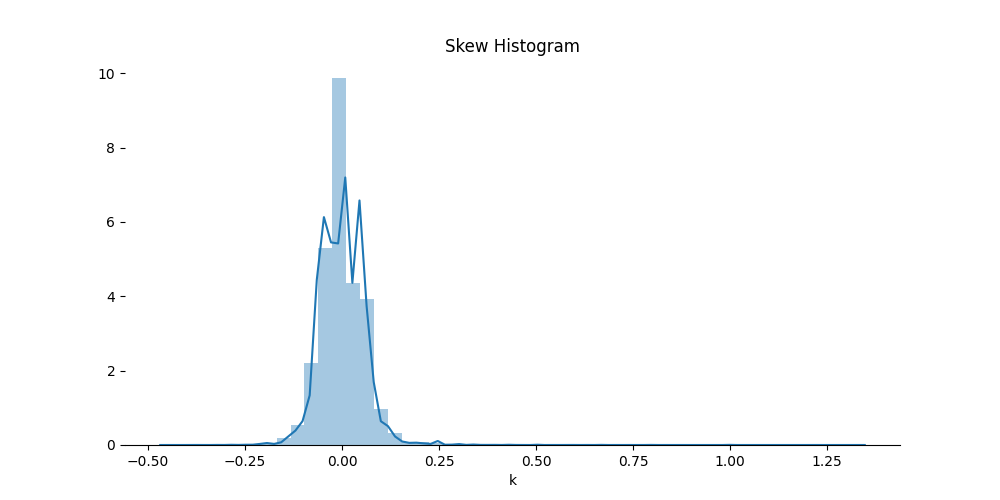

In [22]:
fig, ax=plt.subplots(figsize=(10,5))
sns.distplot(histogram_df['skew'],bins=50,ax=ax)
ax.set_title("Skew Histogram")
ax.set_xlabel("k")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
%matplot plt

The histogram is normally distributed and the mean is 0. So the Yelp written reviews doesn't skew negative.

## Business with most Five Star Reviews
* The following plot shows top 10 business names with the most Five Star Reviews.  
* I selected interested columns from dataframe **business** and **review** and **joined** them. Then filtered **5 star reviews** ,groupby **business name** and **count**.  
* Starbucks and Hash House A Go Go are the two most popular businesses from the Yelp reviews with most Five Star ratings. 

In [23]:
busi_only = business.select("business_id","name")
review_only = review.select("business_id","stars")
busi_review = busi_only.join(review_only,busi_only.business_id==review.business_id)
busi_review.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+-----+
|         business_id|                name|         business_id|stars|
+--------------------+--------------------+--------------------+-----+
|-MhfebM0QIsKt87iD...|Bellagio Gallery ...|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|      Rio Hair Salon|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|Deagan's Kitchen ...|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|Cabo Mexican Rest...|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|Raising Cane's Ch...|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+--------------------+--------------------+-----+
only showing top 5 rows

In [24]:
barh_df = busi_review.filter(busi_review.stars==5).groupBy("name").count().orderBy('count',ascending=False)
barh_pdf = barh_df.limit(10).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

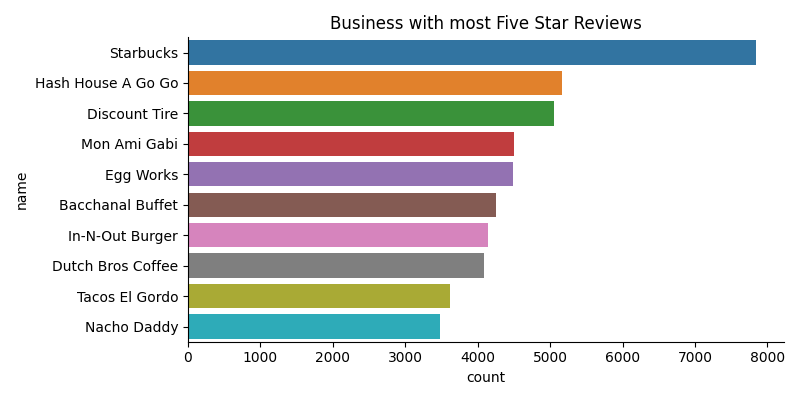

In [25]:
ax = sns.factorplot(x="count", y="name", data=barh_pdf, size=4, aspect=2,kind="bar")
for axes in ax.axes.flat:
    axes.set_title("Business with most Five Star Reviews")
plt.tight_layout()
plt.show()
%matplot plt

## Should the Elite be Trusted?


* Step 1: load data **user** dataset from S3.
* Step 2: select interested columns from **user**, **review** and **business**.
* Step 3: filter **nonelite** users and **join 3 dataframes**; calculate the difference between nonelite users' rating and the actual business rating.  
* Step 4: filter **elite** users and **join 3 dataframes**; calculate the difference between elite users' rating and business actual rating.  
* Step 5: create a visualizaton which consists of two barplots.

In [26]:
user = spark.read.json('s3://sta9760project02/yelp_academic_dataset_user.json')
user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

* Select interested columns from 3 dataframes: **user**, **review** and **business** and rename some columns.

In [27]:
user_int = user.select("user_id","elite")
review_int = review.select("business_id","user_id","stars").withColumnRenamed('stars','stars_review')
business_int = business.select("business_id","stars").withColumnRenamed('stars','stars_actual')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### NonElite Users

In [28]:
user_int_nonelite = user_int.filter(user_int.elite == "")
newDF_nonelite = user_int_nonelite.join(review_int,user_int_nonelite.user_id==review_int.user_id)\
.join(business_int,review_int.business_id==business_int.business_id)\
.select("elite","stars_review","stars_actual")

newDF_nonelite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------+------------+
|elite|stars_review|stars_actual|
+-----+------------+------------+
|     |         5.0|         4.0|
|     |         1.0|         3.5|
|     |         5.0|         5.0|
|     |         5.0|         4.0|
|     |         5.0|         4.5|
+-----+------------+------------+
only showing top 5 rows

Convert to Pandas dataframe and calculate the **difference** between **nonelite users'** review and the actual rating of a business.

In [29]:
nonelite_df = newDF_nonelite.toPandas()
nonelite_df["error"] = nonelite_df["stars_review"]-nonelite_df["stars_actual"]
nonelite_df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  elite  stars_review  stars_actual  error
0                 5.0           4.0    1.0
1                 5.0           5.0    0.0
2                 1.0           3.5   -2.5
3                 5.0           4.0    1.0
4                 5.0           4.5    0.5

### Elite Users

In [30]:
user_int_elite = user_int.filter(user_int.elite != "None")
newDF_elite = user_int_elite.join(review_int,user_int_elite.user_id==review_int.user_id)\
.join(business_int,review_int.business_id==business_int.business_id)\
.filter(col("elite")!= "")\
.select("elite","stars_review","stars_actual")

newDF_elite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+------------+------------+
|              elite|stars_review|stars_actual|
+-------------------+------------+------------+
|               2017|         4.0|         4.5|
|               2017|         5.0|         2.5|
|2010,2011,2012,2013|         1.0|         2.0|
|          2017,2018|         4.0|         3.0|
|          2017,2018|         5.0|         4.0|
+-------------------+------------+------------+
only showing top 5 rows

Convert to Pandas dataframe and calculate the **difference** between **elite users'** review and the actual rating of a business.

In [31]:
elite_df = newDF_elite.toPandas()
elite_df["error"] = elite_df["stars_review"]-elite_df["stars_actual"]
elite_df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                 elite  stars_review  stars_actual  error
0                 2017           4.0           4.5   -0.5
1                 2017           5.0           2.5    2.5
2  2010,2011,2012,2013           1.0           2.0   -1.0
3            2017,2018           4.0           3.0    1.0
4            2017,2018           5.0           4.0    1.0

### Plot

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

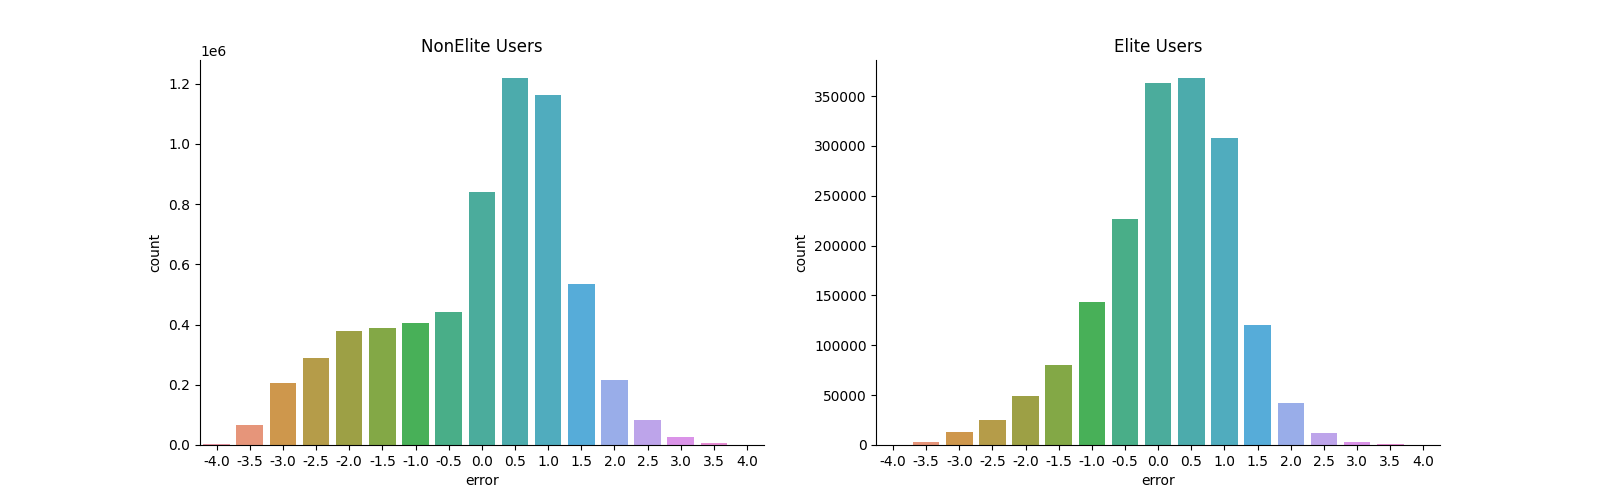

In [32]:
fig, ax=plt.subplots(1,2,figsize=(16,5))
sns.countplot(x=nonelite_df["error"],ax=ax[0])
sns.countplot(x=elite_df["error"],ax=ax[1])

ax[0].set_title("NonElite Users")
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[1].set_title("Elite Users")
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
%matplot plt

From the above figure, we can see that the rating errors of elite users are concentrated around 0, while the distribution of rating errors of nonelite users are relatively scattered. So the conclusion is that elite users' ratings are more accurate than nonelite users'.

## Who are Top Influencers and Are they more accurate?

### Find top 10 influencers who has most fans

In [33]:
user.orderBy("fans",ascending=False).select("name","fans").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|     name| fans|
+---------+-----+
|     Mike|11568|
|    Katie| 3315|
|Cherylynn| 2916|
|      Fox| 2718|
|   Daniel| 2634|
|    Ruggy| 2516|
|  Richard| 2316|
|    Peter| 2280|
|  Candice| 2263|
|  Jessica| 2140|
+---------+-----+
only showing top 10 rows

### The number of Fans VS. Rating Errors
I'm curious about the relationship between the number of fans and users' rating errors. So I tried to draw a scatterplot.  

Select interested columns from dataframes **user**, **review** and **business** and rename some columns.  
**Notes**: For the dataset user, I filtered out users who have less than 100 fans. Only one user (Mike) has more than 10000 fans and I sift out him.

In [34]:
user_sel = user.filter((user.fans > 100)&(user.fans < 10000)).select("user_id","fans")
review_sel = review.select("business_id","stars","user_id").withColumnRenamed('stars','stars_review')
business_sel = business.select("business_id","stars").withColumnRenamed('stars','stars_actual')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Join them and select interested columns

In [35]:
join_df = user_sel.join(review_sel,user_sel.user_id==review_sel.user_id)\
.join(business_sel,review_sel.business_id==business_sel.business_id)\
.select("fans","stars_review","stars_actual")

join_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+------------+------------+
|fans|stars_review|stars_actual|
+----+------------+------------+
| 129|         5.0|         4.0|
| 210|         5.0|         5.0|
| 246|         5.0|         4.5|
| 246|         3.0|         2.5|
| 246|         4.0|         4.0|
+----+------------+------------+
only showing top 5 rows

Convert to Pandas dataframe and calculate the difference between users' review and the actual rating of a business.

In [36]:
pdf = join_df.toPandas()
pdf["error"] = pdf["stars_review"]-pdf["stars_actual"]
pdf.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   fans  stars_review  stars_actual  error
0   129           5.0           4.0    1.0
1   210           5.0           5.0    0.0
2   246           5.0           4.5    0.5
3   246           3.0           2.5    0.5
4   246           4.0           4.0    0.0

Draw a scatterplot of the number of fans versus rating errors.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

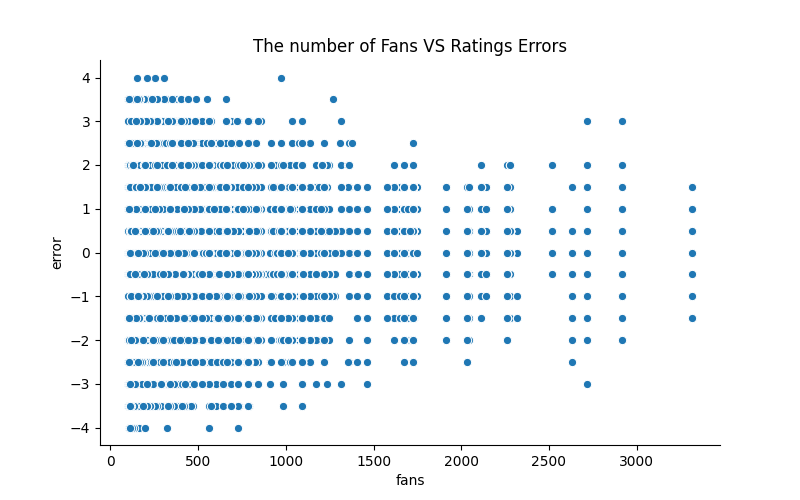

In [37]:
fig, ax=plt.subplots(figsize=(8,5))
sns.scatterplot(x="fans",y="error",data=pdf)

ax.set_title("The number of Fans VS Ratings Errors")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

%matplot plt

The margin of error narrows as the number of fans increases. This phenomenon is especially obvious between 0 and 2000 fans. It suggested that users who have more fans tend to be more accurate.